# Causal inference in statistics

### 1.2.1

a. Corelation doesn't imply causation  
b. X causes Y doesn't imply Y causes X  
c. People who hurry are probably more prone to being late. The hurrying probably makes them less late but not enough to overcome there inherent lateness. Reminds me of the example of treatments being given to already ill patients.

### 1.2.3

This is an interesting one. Tim has a better batting average than teammate Frank. However Frank has a better average against both left and right handed pitchers. Say what....?

My example of how this can happen. First assume that right handed pitchers are a lot better than lefties. Then it might the case that Tim has had less right handed players than Frank.

In [2]:
import pandas as pd

In [3]:
batting_averages =  pd.DataFrame({
    "Player":["Tim", "Tim", "Frank", "Frank"],
    "Pitcher Hand": ["Right", "Left", "Right", "Left"],
    "Balls Faced": [20, 80, 40, 60],
    "Hits": [4, 32, 9, 25],
}).assign(Average= lambda x: x['Hits'] / x['Balls Faced'])

In [4]:
# Note Frank is better against both as required!
batting_averages

,Player,Pitcher Hand,Balls Faced,Hits,Average
0,Tim,Right,20,4,0.200000
1,Tim,Left,80,32,0.400000
2,Frank,Right,40,9,0.225000
3,Frank,Left,60,25,0.416667


In [5]:
# Note Tim is better overall! 
batting_averages\
        .groupby('Player')[['Balls Faced','Hits']]\
        .sum()\
        .assign(Average= lambda x: x['Hits'] / x['Balls Faced'])

,Balls Faced,Hits,Average
Player,,,
Frank,100,34,0.34
Tim,100,36,0.36


### 1.2.3

a. Find out the stone size and then use the segregated treatment efficacy numbers.  
b. You want to look separately. The doctor doing the hard ones might have a low success rate despite being better at both. Much like Frank above.

### 1.2.4

I really don't think this question is solvable!  

Nor does this person: https://math.stackexchange.com/questions/2959820/causal-inference-a-primer-study-question !



### 1.3.1

variables: [treatment, depression, lolly, recovery]

### 1.3.2

In [6]:
# a.
data = pd.DataFrame.from_records(
    [
        ["Male", "Never finished high school", 112],
        ["Male", "High school", 231],
        ["Male", "College", 595],
        ["Male", "Graduate school", 242],
        ["Female", "Never finished high school", 136],
        ["Female", "High school", 189],
        ["Female", "College", 763],
        ["Female", "Graduate school", 172],
    ],
    columns=["gender", "highest_education", "occurrence"],
)
a = (
    data.loc[data["highest_education"] == "High school", "occurrence"].sum()
    / data["occurrence"].sum()
)
b = (
    data.loc[
        (data["highest_education"] == "High school") | (data["gender"] == "Female"),
        "occurrence",
    ].sum()
    / data["occurrence"].sum()
)
c = (
    data.loc[
        (data["highest_education"] == "High school") & (data["gender"] == "Female"),
        "occurrence",
    ].sum()
    / data.loc[data["gender"] == "Female", "occurrence"].sum()
)
d = (
    data.loc[
        (data["highest_education"] == "High school") & (data["gender"] == "Female"),
        "occurrence",
    ].sum()
    / data.loc[data["highest_education"] == "High school", "occurrence"].sum()
)

print(f"a. P(High School = {a:.3f})")
print(f"b. P(High School OR Female = {b:.3f})")
print(f"c. P(High School | Female = {c:.3f})")
print(f"d. P(Female | High School = {d:.3f})")


a. P(High School = 0.172)
b. P(High School OR Female = 0.611)
c. P(High School | Female = 0.150)
d. P(Female | High School = 0.450)


### 1.3.3

Compute P(“craps”|“11”) assuming that there are twice as many roulette tables as craps
games at the casino.

In [7]:
# a
p_11 = 1/18 * 1/3 + 1/38 * 2/3
p_craps_given_11 = (1/18 * 1/3) / p_11
print(f"Chance of craps given 11 and twice as many roulette tables = {p_craps_given_11:.3f}")

Chance of craps given 11 and twice as many roulette tables = 0.514


In [8]:
# b
p_10 = 3/36 * 2/3 + 1/38 * 1/3
p_roulette_given_10 = (1/38 * 1/3) / p_10
print(f"Chance of roulette given 10 and twice as many craps tables = {p_roulette_given_10:.3f}")

Chance of roulette given 10 and twice as many craps tables = 0.136


### 1.3.4

a. Intuition says the chance is 1/2 as it is either card 1 or 3. The probability is actually greater than a half as the very fact it has one half black suggests that is card 1.

b
$$
\begin{aligned}
P(CD = black)
    &= P(CD  = black | I = 1)P(I = 1) + P(CD  = black | I = 2)P(I = 2)+ P(CD  = black | I = 3)P(I = 3)\\
    &= 1 * 1/3 + 0 * 1/3 + P(CD  = black | I = 3) * 1/3\\
    &= 1/3 + [P(CD  = black | I = 3, CU = white)p(CU = white | I = 3) + P(CD  = black | I = 3, CU = black)p(CU = black | I = 3)] * 1/3\\
    &= 1/3 + [1 * 1/2 + 0 * 1/2] * 1/3 \\
    &= 1/3 + 1/6\\
    &= 1/2
\end{aligned}
$$

c
Use Bayes’ theorem to find the correct probability of a randomly selected card’s back being black if you observe that its front is black?

$$
\begin{aligned}
P(CD = black | CU = black)
    &= P(CD = black, CU = black) / P(CU = black) \\
    &= 1/3 / 1/2 \\
    &= 2/3
\end{aligned}
$$

### 1.3.5

Monty hall.

OK 
 - let D in [1, 2, 3] be the initial choice of door
 - let F in [1, 2, 3] be the final choice
 - let C in [1, 2, 3] be the door with the Car!
 - let H in [1, 2, 3] be the door revealed by the host with a goat.
 - let S be in [True, False] be whether the user swaps!

Note 
- P(D = i) = 1/3 for all doors
- P(C = i) = 1/3 for all doors
- P(C = i | H = i) = 0 as the host wont show the Car!

$$
P(F = C | S = True) = \sum_i P(F = C | S = True, D = i, C = D)P(D = i, C = D) + P(F = C | S = True, D = i, C != D)P(D = i, C != D) \\
    = \sum_i 0 * P(D = i, C = D) +  1 * 1/3 * 2/3\\
    = \sum_i 2/9\\
    = 2/3
$$
Compared to:
$$
P(F = C | S = False) = P(D = C) = 1/3
$$

### 1.3.6

(a) Prove that, in general, both $\sigma_{XY}$  and $\rho_{XY}$ vanish when X and Y are independent. [Hint:
Use Eqs. (1.16) and (1.17).]

First we show assuming independence
$$
E[XY] = \sum_{x, y} xy P[X=x, Y=y] \\
E[XY] = \sum_{x, y} xy P[X=x]P[Y=y] \\
E[XY] = \sum_{x}\sum_{y} xy P[X=x]P[Y=y] \\
E[XY] = \sum_{x}xP[X=x]\sum_{y} y P[Y=y] \\
E[XY] = E[X]E[Y]
$$

So then:
$$
\sigma_{XY} \
    = E[(X-\bar{X})(Y-\bar{Y})] \\
    = E[XY] - E[\bar{X}Y] - E[X\bar{Y}] + E[\bar{X}\bar{Y}] \\
    = E[XY] - E[X]E[Y] - E[X]E[Y] + E[E[X]E[Y]] \\
    = E[XY] - E[X]E[Y] \\
    = 0 \quad\text{Due to ind.}
$$

(b) Give an example of two variables that are highly dependent and, yet, their correlation
coefficient vanishes.

### 1.3.7

In [9]:
coin_data = pd.DataFrame(
    {
        "c1": "H H T T".split(),
        "c2": "H T H T".split(),
    }
)
coin_data['x'] = 1 * ~((coin_data['c1'] == 'T') & (coin_data['c2'] == 'T'))
coin_data['y'] = 1 * (coin_data['c1'] == coin_data['c2'])
coin_data


,c1,c2,x,y
0,H,H,1,1
1,H,T,1,0
2,T,H,1,0
3,T,T,0,1


In [10]:
print(f"E(X) = {coin_data['x'].mean()}")
print(f"E(Y) = {coin_data['y'].mean()}")
print(f"E(Y|X = 1) = {coin_data[coin_data['x'] == 1]['y'].mean()}")
print(f"E(Y|X = 0) = {coin_data[coin_data['x'] == 0]['y'].mean()}")
print(f"E(X|Y = 1) = {coin_data[coin_data['y'] == 1]['x'].mean()}")
print(f"E(X|Y = 0) = {coin_data[coin_data['y'] == 0]['x'].mean()}")
print(f"Var(X) = {coin_data[['x']].var() * 3/4}")
print(f"Var(Y) = {coin_data[['y']].var() * 3/4}")
print(f"Cov(X, Y) = {(coin_data[['x','y']].cov() * 3/4)['x']['y']}")
print(f"c) 1/2")
print(f"d) 1/3")
print(f"e) no?")

E(X) = 0.75
E(Y) = 0.5
E(Y|X = 1) = 0.3333333333333333
E(Y|X = 0) = 1.0
E(X|Y = 1) = 0.5
E(X|Y = 0) = 1.0
Var(X) = x    0.1875
dtype: float64
Var(Y) = y    0.25
dtype: float64
Cov(X, Y) = -0.125
c) 1/2
d) 1/3
e) no?


### 1.3.8

In [11]:
from itertools import product
import numpy as np

craps_data = pd.DataFrame(product(range(1, 7), repeat=2), columns=["X", "Z"])
craps_data['Y'] = craps_data['X'] + craps_data['Z']


In [12]:
print(f"E(X) = {craps_data['X'].mean()}")
print(f"E(Y) = {craps_data['Y'].mean()}")
print()
for x in craps_data["X"].unique():
    print(f"E(Y|X={x}) = {craps_data[craps_data['X']==x]['Y'].mean()}")
print()
for y in craps_data["Y"].unique():
    print(f"E(X|Y={y}) = {craps_data[craps_data['Y']==y]['X'].mean()}")

# print(f"Var(X) = {craps_data['X'].var()}")
print(f"Var(X) = {np.var(craps_data['X'])}")
print(f"Var(Y) = {np.var(craps_data['Y'])}")
print(f"Cov(X, Y), = {np.cov(craps_data['X'], craps_data['Y'], bias=True)}")
print(f"Cov(X, Z), = {np.cov(craps_data['X'], craps_data['Z'], bias=True)}")


E(X) = 3.5
E(Y) = 7.0

E(Y|X=1) = 4.5
E(Y|X=2) = 5.5
E(Y|X=3) = 6.5
E(Y|X=4) = 7.5
E(Y|X=5) = 8.5
E(Y|X=6) = 9.5

E(X|Y=2) = 1.0
E(X|Y=3) = 1.5
E(X|Y=4) = 2.0
E(X|Y=5) = 2.5
E(X|Y=6) = 3.0
E(X|Y=7) = 3.5
E(X|Y=8) = 4.0
E(X|Y=9) = 4.5
E(X|Y=10) = 5.0
E(X|Y=11) = 5.5
E(X|Y=12) = 6.0
Var(X) = 2.9166666666666665
Var(Y) = 5.833333333333333
Cov(X, Y), = [[2.91666667 2.91666667]
 [2.91666667 5.83333333]]
Cov(X, Z), = [[2.91666667 0.        ]
 [0.         2.91666667]]


### 2.4.1

a. For each pair of non-adjacent nodes in this graph, find a set of variables that d-separates that pair. What does this list tell us about independencies in the data?

b. Repeat question (a) assuming that only variables in the set {Z3,W,X,Z1} can be measured.

c. For each pair of non-adjacent nodes in the graph, determine whether they are independent conditional on all other variables.

d. For every variable V in the graph, find a minimal set of nodes that renders V independent of all other variables in the graph.

e. Suppose we wish to estimate the value of Y from measurements taken on all other variables in the model. Find the smallest set of variables that would yield as good an estimate as before.

f. Repeat Question (e) assuming that we wish to estimate the value of Z2.

g. Suppose we wish to predict the value of Z2 from measurements of Z3. Would the quality of our prediction improve if we add measurement of W? Explain.

In [59]:
import networkx as nx

graph_two_point_eight = nx.DiGraph(directed=True)
graph_two_point_eight.add_edges_from([
    ('Z', 'W'),
    ('W', 'U'),
    ('X', 'W'),
    ('X', 'Y'),
    ('T', 'Y'),
    ('T', 'Z'),
    ])

graph_two_point_nine = nx.DiGraph(directed=True)
graph_two_point_nine.add_edges_from([
    ('Z1', 'X'),
    ('Z1', 'Z3'),
    ('Z3', 'X'),
    ('Z3', 'Y'),
    ('X', 'W'),
    ('W', 'Y'),
    ('Z2', 'Y'),
    ('Z2', 'Z3'),
    ])

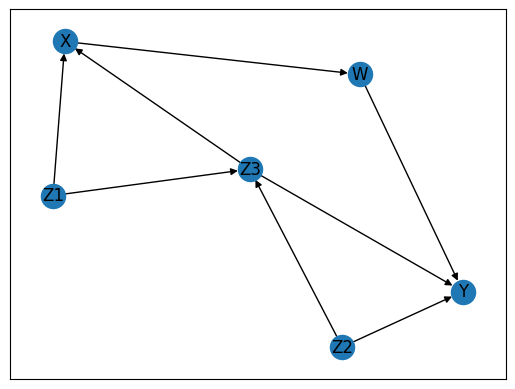

In [169]:
import numpy as np

np.random.seed(19)

pos_eight = nx.spring_layout(graph_two_point_eight)
pos_nine = nx.spring_layout(graph_two_point_nine)

# nx.draw_networkx(graph_two_point_eight, pos_eight, arrows=True)
nx.draw_networkx(graph_two_point_nine, pos_nine, arrows=True)


In [194]:
from itertools import zip_longest, chain


def is_d_connected(
    graph: nx.classes.graph.Graph,
    source: str,
    target: str,
    conditioned_on: set[str] | None = None,
    verbose: bool = False,
):
    if conditioned_on is None:
        conditioned_on = set()
    
    if {source, target}.intersection(conditioned_on):
        return False
    
    d_connected = False

    undirected_graph = graph.to_undirected()
    potential_routes = nx.all_simple_paths(
        undirected_graph, source=source, target=target
    )
    for route in potential_routes:
        route_open = True  # assume the route is open!
        if verbose:
            print(f"Route: {draw_route(graph, route)}")
        for i, (previous_node, node, next_node) in enumerate(
            zip(route, route[1:], route[2:])
        ):
            if verbose:
                print(f"{i}. ", draw_route(graph, (previous_node, node, next_node)))

            # Collider case first
            if graph.has_edge(previous_node, node) and graph.has_edge(next_node, node):
                if verbose:
                    print(f"{node} is a collider.")
                unblocked_by = (
                    nx.descendants(graph, node)
                    .union(set([node]))
                    .intersection(conditioned_on)
                )
                if not unblocked_by:
                    if verbose:
                        print(f"This route is blocked by the collider {node}.")
                    route_open = False
                    # break
                if verbose:
                    print(f"{node} is a collider but is unblocked by {unblocked_by}")

            # Not a collider.
            elif node in conditioned_on:
                if verbose:
                    print(
                        "This route is blocked as the non-collider"
                        f" {node} is conditioned on."
                    )
                route_open = False
                # break

        if route_open:
            if verbose:
                print(f"Route is not blocked")
            d_connected = True

        if verbose:
            print()

    if d_connected:
        if verbose:
            print(f"There is a route!")
        return True
    if verbose:
        print(f"All routes are blocked")
    return False


def draw_route(graph, nodes):
    arrows = [
        " -> " if graph.has_edge(node, next_node) else " <- "
        for node, next_node in zip(nodes, nodes[1:])
    ]
    return "".join(x for x in chain.from_iterable(zip_longest(nodes, arrows)) if x)


a. For each pair of non-adjacent nodes in this graph, find a set of variables that d-separates that pair. What does this list tell us about independencies in the data?

In [195]:
from itertools import combinations

non_adjacent_pairs = [
    (x, y)
    for x, y in combinations(graph_two_point_nine.nodes, r=2)
    if x != y and not graph_two_point_nine.to_undirected().has_edge(x, y)
]
non_adjacent_pairs


[('Z1', 'Y'),
 ('Z1', 'W'),
 ('Z1', 'Z2'),
 ('X', 'Y'),
 ('X', 'Z2'),
 ('Z3', 'W'),
 ('W', 'Z2')]

In [197]:
combinations_of_nodes = [
    set(x)
    for i in range(len(graph_two_point_nine.nodes) + 1)
    for x in combinations(graph_two_point_nine.nodes, r=i)
]
# combinations_of_nodes

for node, other in non_adjacent_pairs:
    for conditioning_set in combinations_of_nodes:
        if not is_d_connected(graph_two_point_nine, node, other, conditioning_set):
            print(node, other, conditioning_set)
            break

Z1 Y {'Z1'}
Z1 W {'Z1'}
Z1 Z2 set()
X Y {'X'}
X Z2 {'X'}
Z3 W {'X'}
W Z2 {'X'}


b. Repeat question (a) assuming that only variables in the set {Z3,W,X,Z1} can be measured.

c. For each pair of non-adjacent nodes in the graph, determine whether they are independent conditional on all other variables.

In [198]:
all_nodes = set(graph_two_point_nine.nodes)

for node, other in non_adjacent_pairs:
    condition_on  = all_nodes - {node, other}
    print(
        node,
        other,
        is_d_connected(graph_two_point_nine, node, other, condition_on),
        condition_on
    )
    
# False means they are independent.


Z1 Y False {'Z2', 'X', 'Z3', 'W'}
Z1 W False {'Z2', 'Y', 'X', 'Z3'}
Z1 Z2 True {'X', 'Y', 'Z3', 'W'}
X Y False {'Z2', 'Z1', 'Z3', 'W'}
X Z2 False {'Y', 'Z1', 'Z3', 'W'}
Z3 W True {'Z2', 'Y', 'Z1', 'X'}
W Z2 True {'X', 'Y', 'Z1', 'Z3'}


d. For every variable V in the graph, find a minimal set of nodes that renders V independent of all other variables in the graph.

In [192]:
for node in combinations_of_nodes[-1]:
    print(f"Starting on node {node}")
    other_nodes = combinations_of_nodes[-1] - {node}
    candidates = (
        set(x)
        for i in range(len(other_nodes) + 1)
        for x in combinations(other_nodes, r=i)
    )
    for candidate in candidates:
        candidate_success = True
        for other in other_nodes:
            node_to_other = is_d_connected(graph_two_point_nine, node, other, candidate)
            # print(f"Testing {node=} {other=} {candidate=} {node_to_other=}")
            if node_to_other:
                candidate_success = False

        # print(node, other, candidate)
        if candidate_success:
            print(node, candidate, 'SUCCESS')
            break


Starting on node Z3
Z3 {'Z2', 'Y', 'Z1', 'X', 'W'} SUCCESS
Starting on node Z2
Z2 {'Y', 'Z1', 'Z3', 'W'} SUCCESS
Starting on node Y
Y {'Z2', 'Z3', 'W'} SUCCESS
Starting on node Z1
Z1 {'Z2', 'X', 'Z3'} SUCCESS
Starting on node X
X {'Z1', 'Z3', 'W'} SUCCESS
Starting on node W
W {'Z2', 'Y', 'X', 'Z3'} SUCCESS


e. Suppose we wish to estimate the value of Y from measurements taken on all other variables in the model. Find the smallest set of variables that would yield as good an estimate as before.

{'Z2', 'Z3', 'W'}

f. Repeat Question (e) assuming that we wish to estimate the value of Z2.

{'Y', 'Z1', 'Z3', 'W'}

g. Suppose we wish to predict the value of Z2 from measurements of Z3. Would the quality of our prediction improve if we add measurement of W? Explain.

Z2 is dependent of W Given Z3 due to the route through X, X, Z1, Z3, Z2 So knowing W would help?

## Other exploration

Other peoples answers::
- https://github.com/joaomacalos/causal_primer/blob/master/Chapter%201/questions_13.md
- https://github.com/fredthedead/causal-inference-in-statistics-solutions/blob/master/ch-1.ipynb
- http://dagitty.net/primer/index.html#study-question-2.4.1